In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score

In [6]:
fake = pd.read_csv('Fake.csv', encoding='ISO-8859-1')
true = pd.read_csv('True.csv', encoding='ISO-8859-1')

# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop=True)

# Shuffle the data
data = shuffle(data)
data = data.reset_index(drop=True)

C:\Users\hemul\AppData\Local\Temp\ipykernel_40312\3291060600.py:1: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types. Specify dtype option on import or set low_memory=False.
  fake = pd.read_csv('Fake.csv', encoding='ISO-8859-1')


In [7]:
if 'date' in data.columns:
    data.drop(["date"], axis=1, inplace=True)
if 'title' in data.columns:
    data.drop(["title"], axis=1, inplace=True)

In [8]:
data.head()

,text,subject,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 163,Unnamed: 164,Unnamed: 165,Unnamed: 166,Unnamed: 167,Unnamed: 168,Unnamed: 169,Unnamed: 170,Unnamed: 171,target
0,It is now a year since the Democratic National...,politics,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
1,How much more depraved does a so-called pastor...,News,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fake
2,CAIRO (Reuters) - Any move by the United State...,worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
3,(Reuters) - Donald Trump is holding a new roun...,politicsNews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true
4,"ERBIL/KIRKUK, Iraq (Reuters) - The United Stat...",worldnews,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,true


In [9]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())


In [10]:
# Remove punctuation
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)


In [11]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hemul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)

In [13]:
example_line = "Trump is the  President of USA in 2024"

In [14]:
preprocessed_line = punctuation_removal(example_line.lower())
words = preprocessed_line.split()
words = [word for word in words if word not in stop]

# Step 2: Predict probabilities using the trained model for each word
word_probabilities = model.predict_proba(words)[:, 1]

# Step 3: Calculate contribution
contributions = word_probabilities / np.sum(word_probabilities) * 100

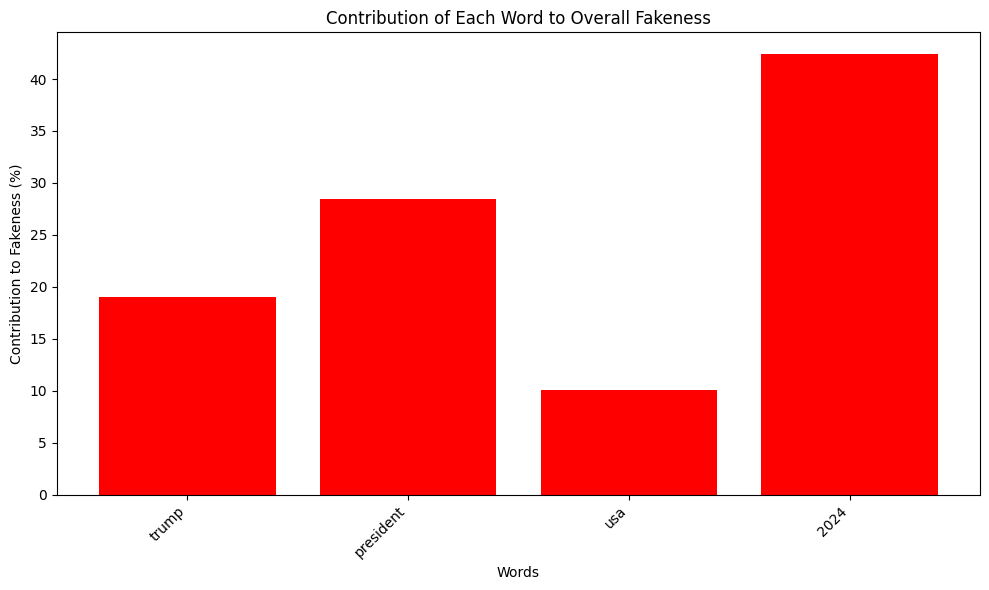

In [15]:
plt.figure(figsize=(10, 6))
plt.bar(range(len(words)), contributions, tick_label=words, color='red')
plt.xlabel('Words')
plt.ylabel('Contribution to Fakeness (%)')
plt.title('Contribution of Each Word to Overall Fakeness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [16]:
example_line_true = "NASA successfully lands rover on Mars"

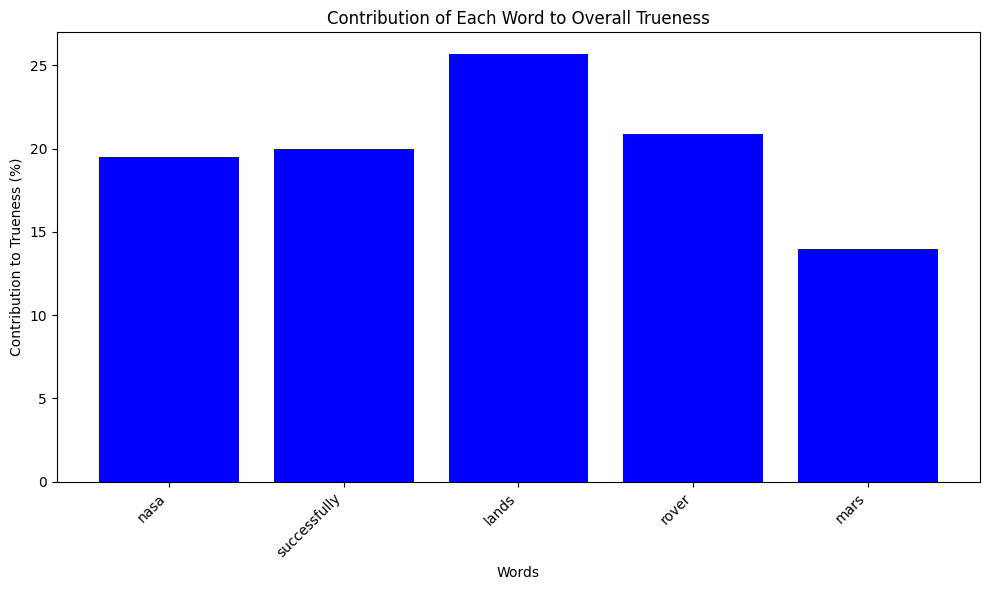

In [17]:
preprocessed_line_true = punctuation_removal(example_line_true.lower())
words_true = preprocessed_line_true.split()
words_true = [word for word in words_true if word not in stop]

# Step 2: Predict probabilities using the trained model for each word
word_probabilities_true = model.predict_proba(words_true)[:, 1]

# Step 3: Calculate contribution
contributions_true = word_probabilities_true / np.sum(word_probabilities_true) * 100

plt.figure(figsize=(10, 6))
plt.bar(range(len(words_true)), contributions_true, tick_label=words_true, color='blue')
plt.xlabel('Words')
plt.ylabel('Contribution to Trueness (%)')
plt.title('Contribution of Each Word to Overall Trueness')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
def preprocess_text(text):
    text = punctuation_removal(text.lower())
    words = text.split()
    words = [word for word in words if word not in stop]
    return words

In [26]:
def plot_word_contributions(text, label):
    words = preprocess_text(text)
    word_probabilities = model.predict_proba(words)[:, 1]
    unique_words = list(set(words))
    unique_probabilities = [word_probabilities[words.index(word)] for word in unique_words]
    contributions = unique_probabilities / np.sum(unique_probabilities) * 100

    # Get the top 5 words
    top_indices = np.argsort(contributions)[-5:][::-1]
    top_words = [unique_words[i] for i in top_indices]
    top_contributions = contributions[top_indices]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(top_words)), top_contributions, tick_label=top_words, color='red' if label == 'fake' else 'blue')
    plt.xlabel('Words')
    plt.ylabel('Contribution to Fakeness (%)' if label == 'fake' else 'Contribution to Trueness (%)')
    plt.title('Top 5 Words Contribution to Overall {}'.format('Fakeness' if label == 'fake' else 'Trueness'))
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

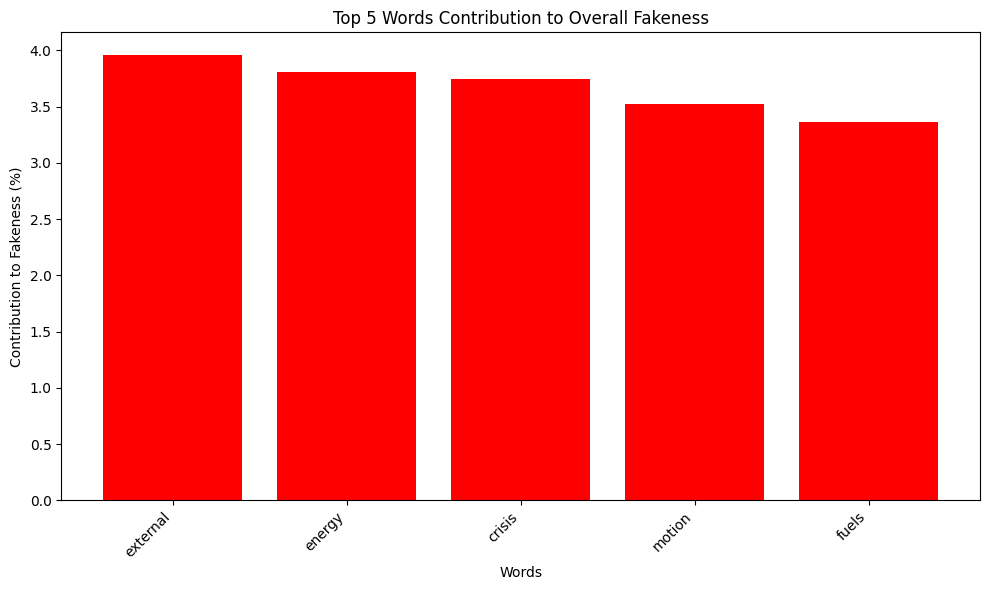

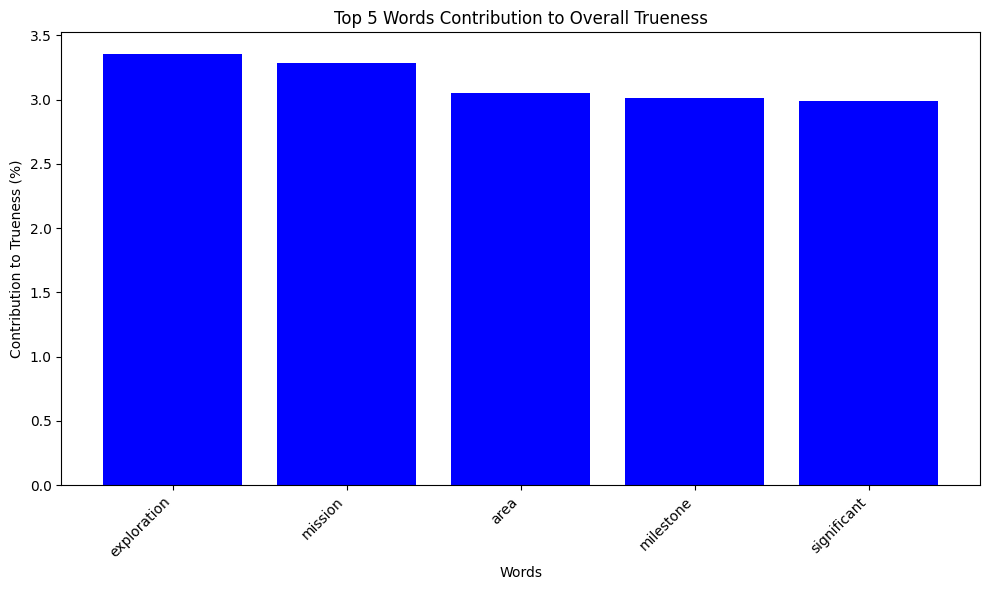

In [27]:
# Example usage
example_line_fake = "Scientists have announced that they have successfully created a perpetual motion machine that will revolutionize the world. This machine, which can run indefinitely without any external energy source, promises to provide free energy to everyone and eliminate the need for fossil fuels. According to the report, the machine was developed in a secret laboratory and will soon be released to the public, potentially ending the global energy crisis and saving the planet from climate change."
example_line_true = "NASA's Perseverance rover has successfully landed on Mars and has begun its mission to search for signs of ancient life. The rover touched down in the Jezero Crater, an area believed to have once been flooded with water, making it an ideal location for studying the planet's geology and climate. Perseverance will collect rock and soil samples, which will be analyzed to determine if microbial life ever existed on Mars. This mission marks a significant milestone in space exploration and our understanding of the Red Planet."

plot_word_contributions(example_line_fake, 'fake')
plot_word_contributions(example_line_true, 'true')
